In [1]:
from __future__ import division
from lin_alg import *
import random

### k - means

1. Randomly select starting locations for k points
2. Assign data points to closest k point
3. If no data changed its cluster membership stop
4. If there was a change, compute new means and repeat

In [2]:
class KMeans:
    """k-means algo"""
    
    def __init__(self, k):
        self.k = k # number of clusters
        self.means = None # means of clusters
        
    def classify(self, input):
        """return the index of the cluster to closest to input"""
        return min(range(self.k),
                  key = lambda i: squared_distance(input, self.means[i]))
    
    def train(self, inputs):
        # choose k rand points as initials
        self.means = random.sample(inputs, self.k)
        assignments = None
        
        while True:
            # Find new assignments
            new_assignments = map(self.classify, inputs)
            
            # If nothing changed we're good to go
            if assignments == new_assignments:
                return
            
            # otherwise keep
            assignments = new_assignments
            
            # And compute new means based on assigments
            for i in range(self.k):
                # get points in cluster
                i_points = [p for p,a in zip(inputs, assignments) if a == i]
                
                # check for membership
                if i_points:
                    self.means[i] = vector_mean(i_points)

In [3]:
inputs = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]

In [4]:
random.seed(0)
clusterer = KMeans(2)
clusterer.train(inputs)

In [5]:
clusterer.means

[[-25.857142857142854, -4.714285714285714],
 [18.333333333333332, 19.833333333333332]]

### Choosing k

In [6]:
def squared_clustering_errors(inputs, k):
    """finds total square error for k"""
    clusterer = KMeans(k)
    clusterer.train(inputs)
    means = clusterer.means
    assignments = map(clusterer.classify, inputs)
    
    return sum(squared_distance(input, means[cluster])
              for input, cluster in zip(inputs, assignments))

In [7]:
ks = range(1, len(inputs) + 1)
errors = [squared_clustering_errors(inputs, k) for k in ks]

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

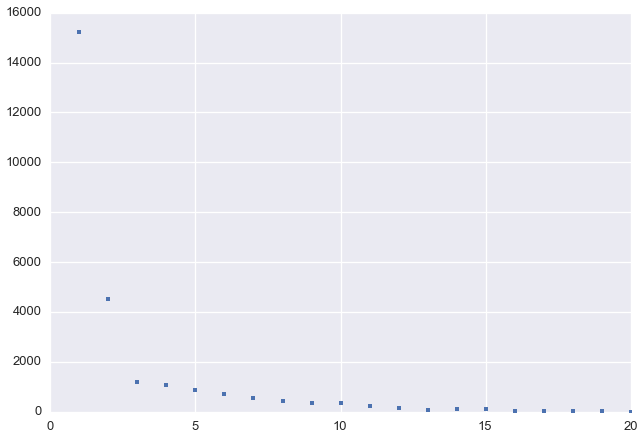

In [9]:
plt.plot(ks, errors, '.')

### Hierarchical Clustering

In [18]:
def is_leaf(cluster):
    """a cluster is a leaf if it has len 1"""
    return len(cluster) == 1

def get_children(cluster):
    """returns children of the cluster if merged else exception"""
    if is_leaf(cluster):
        raise TypeError("a leaf cluster has no children")
    else:
        return cluster[1]
    
def get_values(cluster):
    """returns the value in the cluster (if leaf)
    or all values in leaf clusters below"""
    if is_leaf(cluster):
        return cluster
    else:
        return [value
                for child in get_children(cluster)
                for value in get_values(cluster)]
    
def cluster_distance(cluster1, cluster2, distance_agg = min):
    """compute all pairwise distances btw clusters
    and apply distance_agg to the list"""
    return distance_agg([distance(input1, input2)
                        for input1 in get_values(cluster1)
                        for input2 in get_values(cluster2)])